<a href="https://colab.research.google.com/github/pankjb/Data-Science/blob/main/9_Gold_Price_Random_Forest_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Dependencies

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Read and Analyze Data 

In [29]:
gold_data = pd.read_csv('/content/gold.csv')

In [30]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [31]:
gold_data.shape

(2290, 6)

In [32]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [33]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

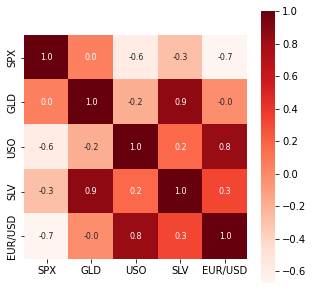

In [34]:
correlation = gold_data.corr()
plt.figure(figsize = (5,5))
sns.heatmap(correlation, cbar = True, square = True, fmt = '0.1f', annot = True, annot_kws = {'size': 8}, cmap = 'Reds' )

Separate Dependent and Independent Variable (Gold Price)

In [35]:
X = gold_data.drop(columns = ['GLD', 'Date'], axis = 1)
Y = gold_data['GLD']

In [36]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [37]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Split Data into Train and Test Data

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)
print(X.shape, X_train.shape, X_test.shape)

(2290, 4) (1832, 4) (458, 4)


Model Application: RandomForestRegressor

In [39]:
model = RandomForestRegressor(n_estimators = 100)


In [40]:
model.fit(X_train, Y_train)

RandomForestRegressor()

Error in Train Data Prediction

In [43]:
X_train_prediction = model.predict(X_train)


In [45]:
#R2 Error in Train Data
error_score = metrics.r2_score(Y_train, X_train_prediction)
print('R2 Error is: ', error_score)

R2 Error is:  0.9984590872538571


Error in Test Data Prediction

In [46]:
X_test_prediction = model.predict(X_test)

#R2 Error in Test Data
error_score_test = metrics.r2_score(Y_test, X_test_prediction)
print('R2 Error is: ', error_score_test)

R2 Error is:  0.9891588628421263
